# Element84 Competency Test - Problem 1
Using CMORPH, what is the total average rainfall for the Santa Cruz province of Argentina for the month of March, 2020?

In [454]:
import pandas as pd
import geopandas as gpd
import requests
import rasterio
import xarray as xr
import h5netcdf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import zipfile
import os
from shapely.geometry import mapping, Polygon
import shapely
import rioxarray

In [455]:
pd.set_option('display.max_columns',None)

## Get geometry for Santa Cruz

In [456]:
country = "Argentina"
province = "Santa Cruz"

In [457]:
if not os.path.exists('data/states_provinces'):
  url = 'https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces.zip'
  r = requests.get(url, allow_redirects=True)
  name = 'states_provinces.zip'
  open('data/'+name, 'wb').write(r.content)
  with zipfile.ZipFile('data/states_provinces.zip', 'r') as zip_ref:
    zip_ref.extractall('data/states_provinces')
  os.remove('data/states_provinces.zip')
else:
  print("Skipping")

Skipping


In [458]:
provinces = gpd.read_file("./data/states_provinces/ne_10m_admin_1_states_provinces.shp")

In [459]:
provinces.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,name_local,type,type_en,code_local,code_hasc,note,hasc_maybe,region,region_cod,provnum_ne,gadm_level,check_me,datarank,abbrev,postal,area_sqkm,sameascity,labelrank,name_len,mapcolor9,mapcolor13,fips,fips_alt,woe_id,woe_label,woe_name,latitude,longitude,sov_a3,adm0_a3,adm0_label,admin,geonunit,gu_a3,gn_id,gn_name,gns_id,gns_name,gn_level,gn_region,gn_a1_code,region_sub,sub_code,gns_level,gns_lang,gns_adm1,gns_region,min_label,max_label,min_zoom,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,name_he,name_uk,name_ur,name_fa,name_zht,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 states provinces,3,ARG-1309,1309,AR-E,NaN,AR,1,Entre Ríos,Entre-Rios,NaN,Provincia,Province,NaN,AR.ER,NaN,NaN,NaN,NaN,10.0,1,20,3,NaN,ER,0.0,-99,3,10,3,13,AR08,NaN,2344682.0,"Entre Rios, AR, Argentina",Entre Ríos,-32.0275,-59.2824,ARG,ARG,2,Argentina,Argentina,ARG,3434137.0,Provincia de Entre Rios,-988655.0,Entre Rios,1.0,NaN,AR.08,NaN,NaN,1.0,khm,AR08,NaN,6.0,11.0,6.0,Q44762,إنتري ريوس,এন্ত্রে রিও প্রদেশ,Entre Ríos,Entre Ríos,Entre Ríos,Entre Ríos,Έντρε Ρίος,एन्ट्रे रियोस,Entre Ríos,Entre Ríos,Entre Ríos,エントレ・リオス州,엔트레리오스,Entre Ríos,Entre Ríos,Entre Ríos,Энтре-Риос,Entre Ríos,Entre Ríos eyaleti,Entre Ríos,恩特雷里奥斯省,1159309789,אנטרה ריוס,Ентре-Ріос,صوبہ انترے ریوس,ایالت انتره ریوز,恩特雷里奥斯省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-58.20011 -32.44713, -58.20012 -32.4..."
1,Admin-1 states provinces,6,URY-8,8,UY-PA,NaN,UY,1,Paysandú,NaN,NaN,Departamento,Department,NaN,UY.PA,NaN,NaN,NaN,NaN,19.0,1,0,8,NaN,PA,0.0,-99,6,8,2,10,UY11,NaN,2347650.0,"PaysandÃº, UY, Uruguay",Paysandú,-32.0933,-57.2240,URY,URY,2,Uruguay,Uruguay,URY,3441242.0,Departamento de Paysandu,-908097.0,"Paysandu, Departamento de",1.0,NaN,UY.11,NaN,NaN,1.0,fra,UY11,NaN,8.0,11.0,8.0,Q16576,إدارة بايساندو,পেসান্ডো বিভাগ,Paysandú,Paysandú,Paysandú,Paysandú,Παϊσαντού,पयसंदु विभाग,Paysandú,Departemen Paysandú,dipartimento di Paysandú,パイサンドゥ県,파이산두,Paysandú,Paysandú,Paysandú,Пайсанду,Paysandú,Paysandu Departmanı,Paysandú,派桑杜省,1159307733,פאיסאנדו,Пайсанду,پایساندو محکمہ,بخش پایساندو,派桑杜省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-58.20012 -32.44720, -58.20011 -32.4..."


In [460]:
scdf = provinces.loc[(provinces['name'] == province) & (provinces['admin'] == country)]
scdf = scdf.reset_index(drop=True)

Recast the longitute of the Santa Cruz polygon to be 0 - 360 rather than -180 - 180 to match CMORPH data

<Axes: >

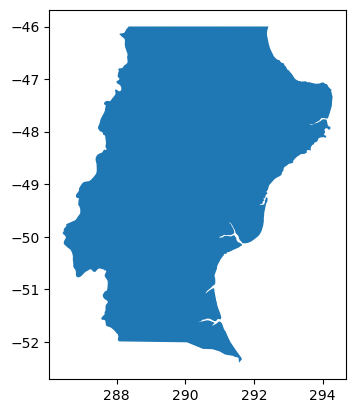

In [461]:
row = scdf.iloc[0]
coords=np.array(row['geometry'].exterior.coords)
coords[:,0]=coords[:,0]+360.
newpoly=Polygon(coords)
scdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[newpoly])
scdf.plot()

In [462]:
sc_shape = scdf.at[0,'geometry']

----

## Compile rain data for March 2020

In [464]:
def downloadRainData(month, day):
  url = 'https://www.ncei.noaa.gov/data/cmorph-high-resolution-global-precipitation-estimates/access/daily/0.25deg/2020/{month:02d}/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_2020{month:02d}{day:02d}.nc'.format(month=month, day=day)
  r = requests.get(url, allow_redirects=True)
  if r.status_code == 200:
    name = 'cmorph2020{month:02d}{day:02d}.nc'.format(month=month, day=day)
    open('data/cmorph/'+name, 'wb').write(r.content)

In [465]:
#for month in range(1,13):
month = 3 # Just getting March data
for day in range(1,32):
  try:
    if not os.path.exists('data/cmorph/cmorph2020{month:02d}{day:02d}.nc'.format(month=month, day=day)):
      downloadRainData(month, day)
      print("Getting 2020/{month:02d}/{day:02d}".format(month=month, day=day), end='\r')
    else:
      print("Skipping 2020/{month:02d}/{day:02d}".format(month=month, day=day), end='\r')
  except Exception as e:
    print(e)
    continue

### Combine all the data files into one over the time dimension

In [466]:
ds = xr.open_mfdataset('./data/cmorph/*.nc', combine='nested', concat_dim="time")
ds

<xarray.Dataset>
Dimensions:      (time: 31, nv: 2, lat: 480, lon: 1440)
Coordinates:
  * time         (time) datetime64[ns] 2020-03-01 2020-03-02 ... 2020-03-31
  * lat          (lat) float32 -59.88 -59.62 -59.38 -59.12 ... 59.38 59.62 59.88
  * lon          (lon) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Dimensions without coordinates: nv
Data variables:
    time_bounds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bounds   (time, lat, nv) float32 dask.array<chunksize=(1, 480, 2), meta=np.ndarray>
    lon_bounds   (time, lon, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    cmorph       (time, lat, lon) float32 dask.array<chunksize=(1, 480, 1440), meta=np.ndarray>
Attributes: (12/57)
    ncei_template_version:      NCEI_NetCDF_Grid_template_V2.0
    title:                      NOAA Climate Data Record (CDR) of CPC Morphin...
    keywords:                   Precipitation, Satellite, High-Resolution, Gl...
    summary:                    The CMORPH CDR is a reprocessed and bias-corr...
    references:                 Xie, P., et al. (2017), Reprocessed, Bias-Cor...
    Conventions:                CF-1.6, ACDD-1.3
    ...                         ...
    geospatial_lat_resolution:  0.25
    geospatial_lat_units:       degrees_north
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_resolution:  0.25
    geospatial_lon_units:       degrees_east

### Extract DataArray for cmorph

In [467]:
rain = ds.cmorph
rain

<xarray.DataArray 'cmorph' (time: 31, lat: 480, lon: 1440)>
dask.array<concatenate, shape=(31, 480, 1440), dtype=float32, chunksize=(1, 480, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-03-01 2020-03-02 ... 2020-03-31
  * lat      (lat) float32 -59.88 -59.62 -59.38 -59.12 ... 59.38 59.62 59.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Attributes:
    standard_name:  lwe_precipitation_rate
    long_name:      NOAA Climate Data Record (CDR) of CPC Morphing Technique ...
    units:          mm/day
    valid_min:      0
    valid_max:      32767
    comment:        !!! CMORPH estimate is rainrate !!!

### Average over time

In [468]:
average_rain = rain.mean(dim='time')
average_rain.rio.write_crs("epsg:4326", inplace=True)

<xarray.DataArray 'cmorph' (lat: 480, lon: 1440)>
dask.array<mean_agg-aggregate, shape=(480, 1440), dtype=float32, chunksize=(480, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 -59.88 -59.62 -59.38 -59.12 ... 59.38 59.62 59.88
  * lon          (lon) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
    spatial_ref  int64 0

## Plot Rainfall

In [469]:
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces',
        scale='10m',
        facecolor='none')

Create bounding box for mapping convenience

In [ ]:
# bounds = sc_shape.bounds
# bounds = list(bounds)
# neworder = [0, 2, 1, 3]
# bounds = [bounds[i] for i in neworder] # Have to do this for later when feeding it to ax.set_extent()
bounds = [-77.09276372561895,-63.54029983538979,-44.44687551389838,-53.59545491495126]

bounds

### Map average rainfall over the month

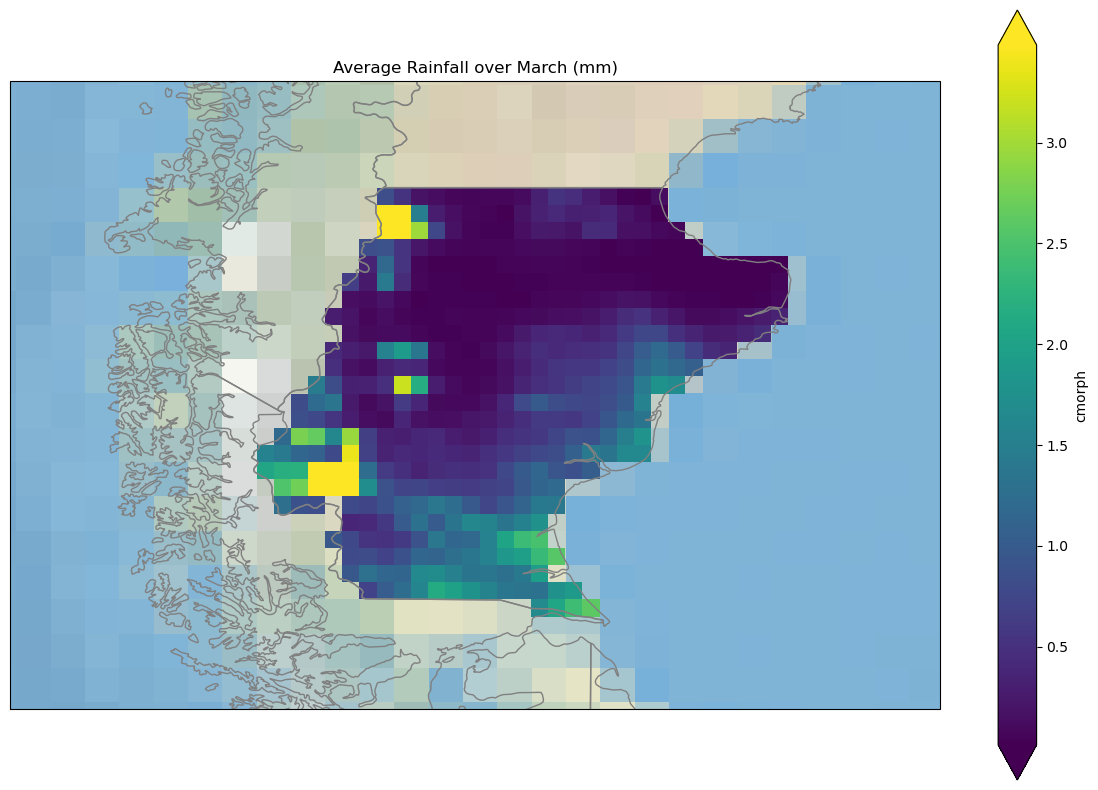

In [480]:
clipped = average_rain.rio.clip(scdf.geometry.apply(mapping), scdf.crs, drop=False, invert=False)

fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(projection=ccrs.PlateCarree())
clipped.plot(ax=ax, robust=True)

scdf.boundary.plot(ax=ax,color='black')
plt.title('Average Rainfall over March (mm)')
ax.add_feature(states_provinces, edgecolor='gray')
ax.set_extent(bounds, crs=ccrs.PlateCarree())
ax.stock_img()

plt.show()

----

## Calculate Mean

In [471]:
df = rain.to_dataframe()
df = df.reset_index()

In [472]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat, crs="EPSG:4326"))
gdf = gdf.drop(['lat', 'lon'], axis=1)
gdf

,time,cmorph,geometry
0,2020-03-01,0.0,POINT (0.12500 -59.87500)
1,2020-03-01,0.0,POINT (0.37500 -59.87500)
2,2020-03-01,0.0,POINT (0.62500 -59.87500)
3,2020-03-01,0.0,POINT (0.87500 -59.87500)
4,2020-03-01,0.0,POINT (1.12500 -59.87500)
...,...,...,...
21427195,2020-03-31,0.0,POINT (358.87500 59.87500)
21427196,2020-03-31,0.0,POINT (359.12500 59.87500)
21427197,2020-03-31,0.0,POINT (359.37500 59.87500)
21427198,2020-03-31,0.0,POINT (359.62500 59.87500)


In [473]:
scdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [474]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [475]:
cdf = gpd.sjoin(gdf, scdf, how="inner")
cdf = cdf[['time','geometry','cmorph']]

In [476]:
cdf

,time,geometry,cmorph
45802,2020-03-01,POINT (290.62500 -52.12500),0.0
45803,2020-03-01,POINT (290.87500 -52.12500),0.0
45804,2020-03-01,POINT (291.12500 -52.12500),0.0
45805,2020-03-01,POINT (291.37500 -52.12500),0.7
47232,2020-03-01,POINT (288.12500 -51.87500),0.0
...,...,...,...
20816365,2020-03-31,POINT (291.37500 -46.12500),0.0
20816366,2020-03-31,POINT (291.62500 -46.12500),0.0
20816367,2020-03-31,POINT (291.87500 -46.12500),0.0
20816368,2020-03-31,POINT (292.12500 -46.12500),0.0


In [477]:
avg_rainfall = cdf[['time','cmorph']].groupby(['time']).mean().reset_index()
avg_rainfall

,time,cmorph
0,2020-03-01,0.531092
1,2020-03-02,0.377311
2,2020-03-03,0.500840
3,2020-03-04,1.919748
4,2020-03-05,0.250420
5,2020-03-06,4.096219
6,2020-03-07,2.035714
7,2020-03-08,0.396429
8,2020-03-09,0.265126
9,2020-03-10,0.244328


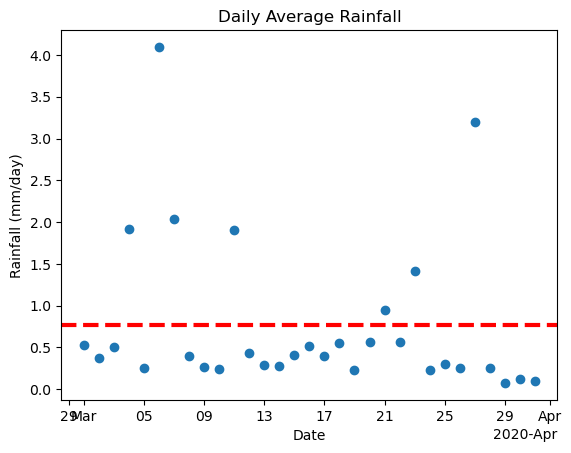

In [478]:
fig, ax = plt.subplots()
ax.scatter(avg_rainfall.time, avg_rainfall.cmorph)
ax.axhline(y=np.nanmean(avg_rainfall.cmorph), color='red', linestyle='--', linewidth=3, label='Avg')

ax.set_title('Daily Average Rainfall')
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall (mm/day)')
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

In [481]:
print("The total average rainfall in the {} province of {} in March 2020 was {} mm/day".format(province, country,str(cdf.cmorph.mean())))

The total average rainfall in the Santa Cruz province of Argentina in March 2020 was 0.76294386 mm/day
